<a href="https://colab.research.google.com/github/promihamid/MachineLearningPrac/blob/main/Day2.3_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outlier:<br>An outlier is a data point that is very different from the rest of the values in a dataset — it lies far away from the average or normal range.<br>Example:If most people's age is around 20–40, but one person is 150 years old — that 150 is an outlier.<br><br>To detect outliers, use the IQR method (values outside Q1–1.5×IQR and Q3+1.5×IQR) or Z-score method (values with z-score > 3 or < –3).<br><br>IQR (Interquartile Range) is the range between the 1st quartile (Q1) and 3rd quartile (Q3), calculated as IQR = Q3 − Q1.
Outliers are values less than Q1 − 1.5×IQR or greater than Q3 + 1.5×IQR<br><br>Suppose we have 4 salaries:
3000, 3200, 3100, 3050<br>Mean without outlier = (3000 + 3200 + 3100 + 3050) / 4 = 3087.5<br>Now add an outlier:
100000.<br>Mean with outlier = (3000 + 3200 + 3100 + 3050 + 100000) / 5 = 22,470.<br><br>Outliers can mislead the average, making the data look much higher or lower than it really is.
They can distort results and affect decision-making and model accuracy.**

In [18]:
import pandas as pd
import seaborn as sns # for graph
import matplotlib.pyplot as plt #for zoom our graph

In [13]:
dataset= pd.read_csv('/content/loan.csv')

In [14]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**In CoapplicantIncome & ApplicantIncome there are huge gap between min and max so there's chance of having outlier in these 2 columns**

**Detect Outliers:<br>We can use Box plot or Displot to visualize and detect if there are outliers or not**

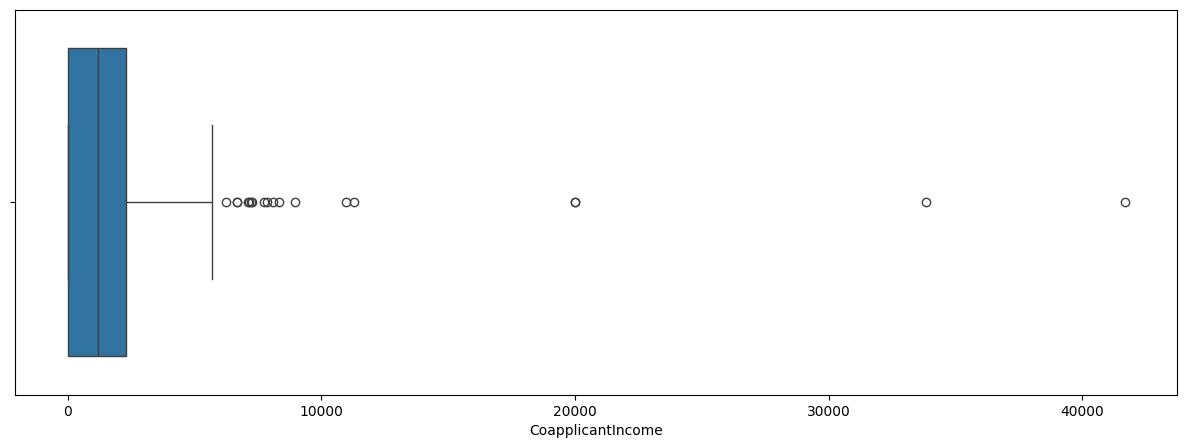

In [34]:
plt.figure(figsize=(15,5)) #for zoom
sns.boxplot(x='CoapplicantIncome', data=dataset)
plt.show()

**these boxed type symbols representing outliers**

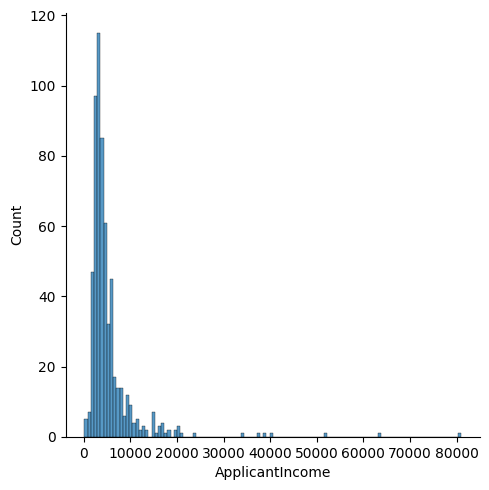

In [21]:
sns.displot(dataset['ApplicantIncome'])
plt.show()

**The tail of this graph is very long--that means there are outliers**

<h1><b><font color='red'>Outliers Removal: Using IQR

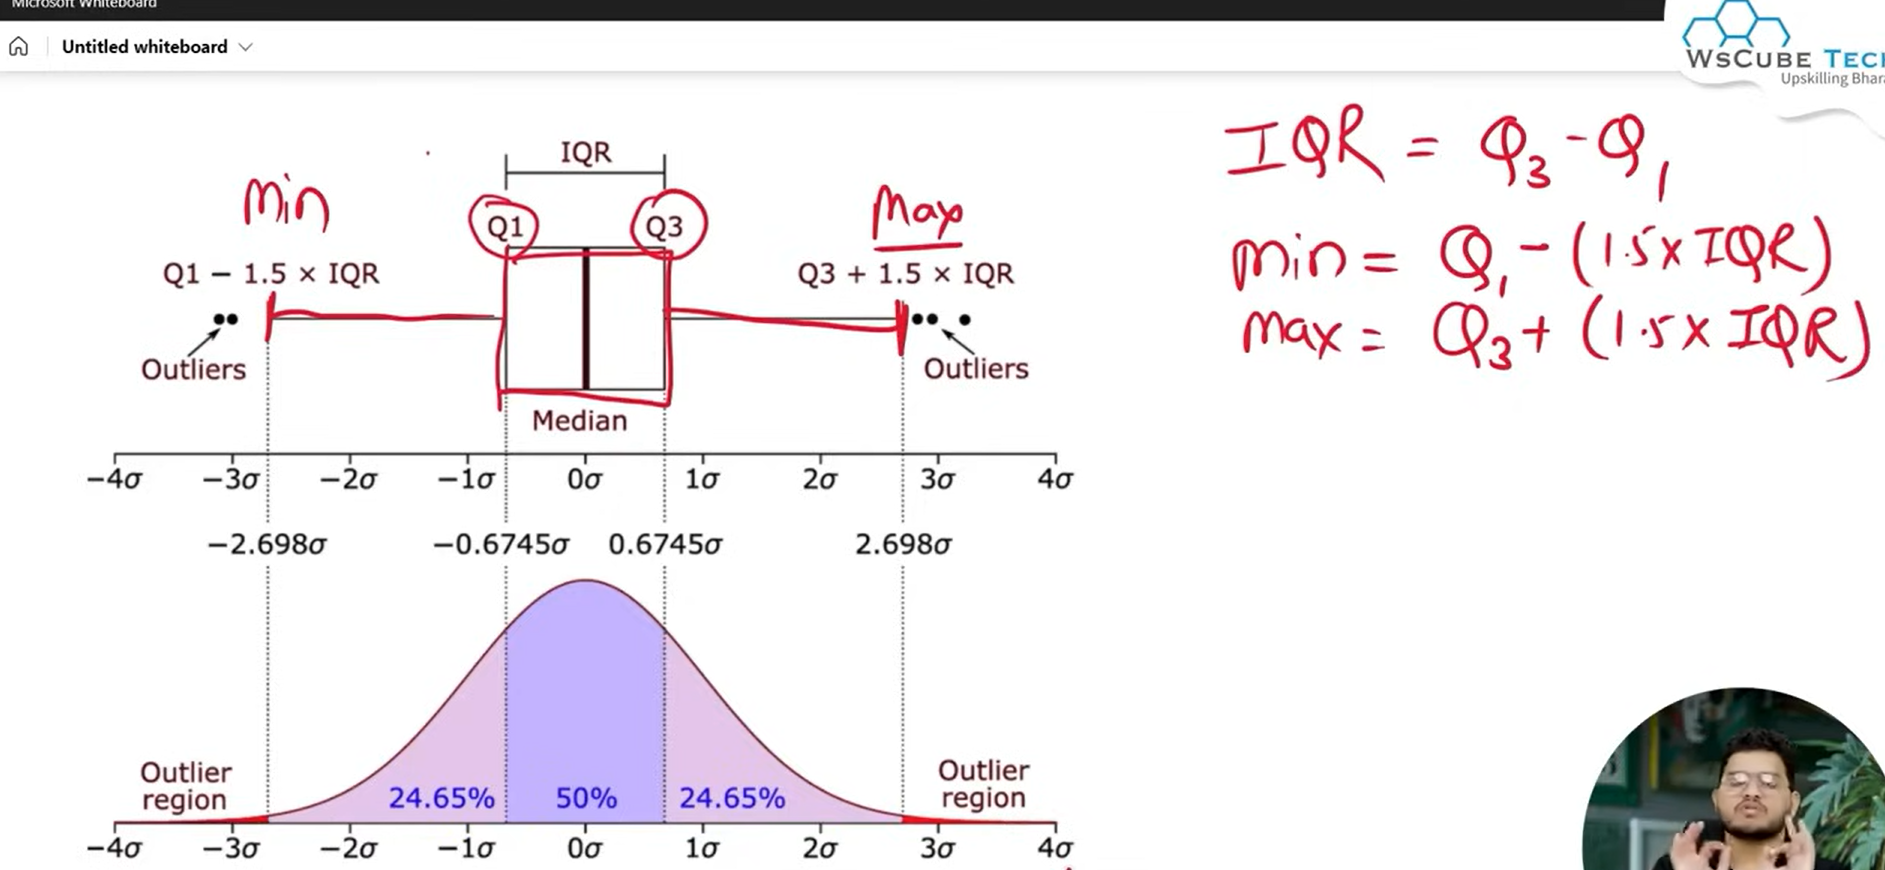

In [23]:
dataset.shape

(614, 13)

In [27]:
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3= dataset['CoapplicantIncome'].quantile(0.75)

In [28]:
IQR = q3 - q1

In [29]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
min_range, max_range

(np.float64(-3445.875), np.float64(5743.125))

**Removing outlier using max_range**

In [35]:
new_dataset = dataset[dataset['CoapplicantIncome'] <= max_range]

In [36]:
new_dataset.shape

(596, 13)

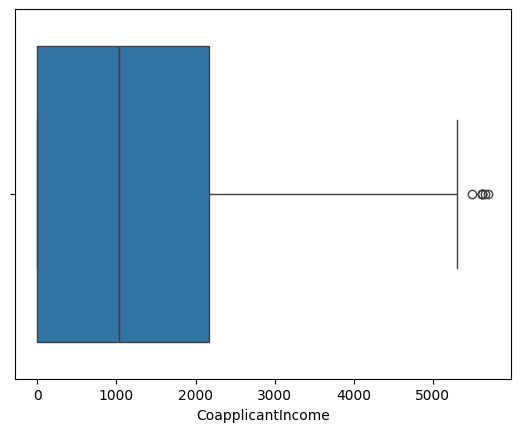

In [37]:
sns.boxplot(x='CoapplicantIncome', data=new_dataset)
plt.show()

**New dataset's graph after reducing outlier. Now there're only few outliers left. You can't remove all the outlier coz sometimes along it most important data might be removed**

<h1><b><font color='red'>Outliers Removal: Using Z-score

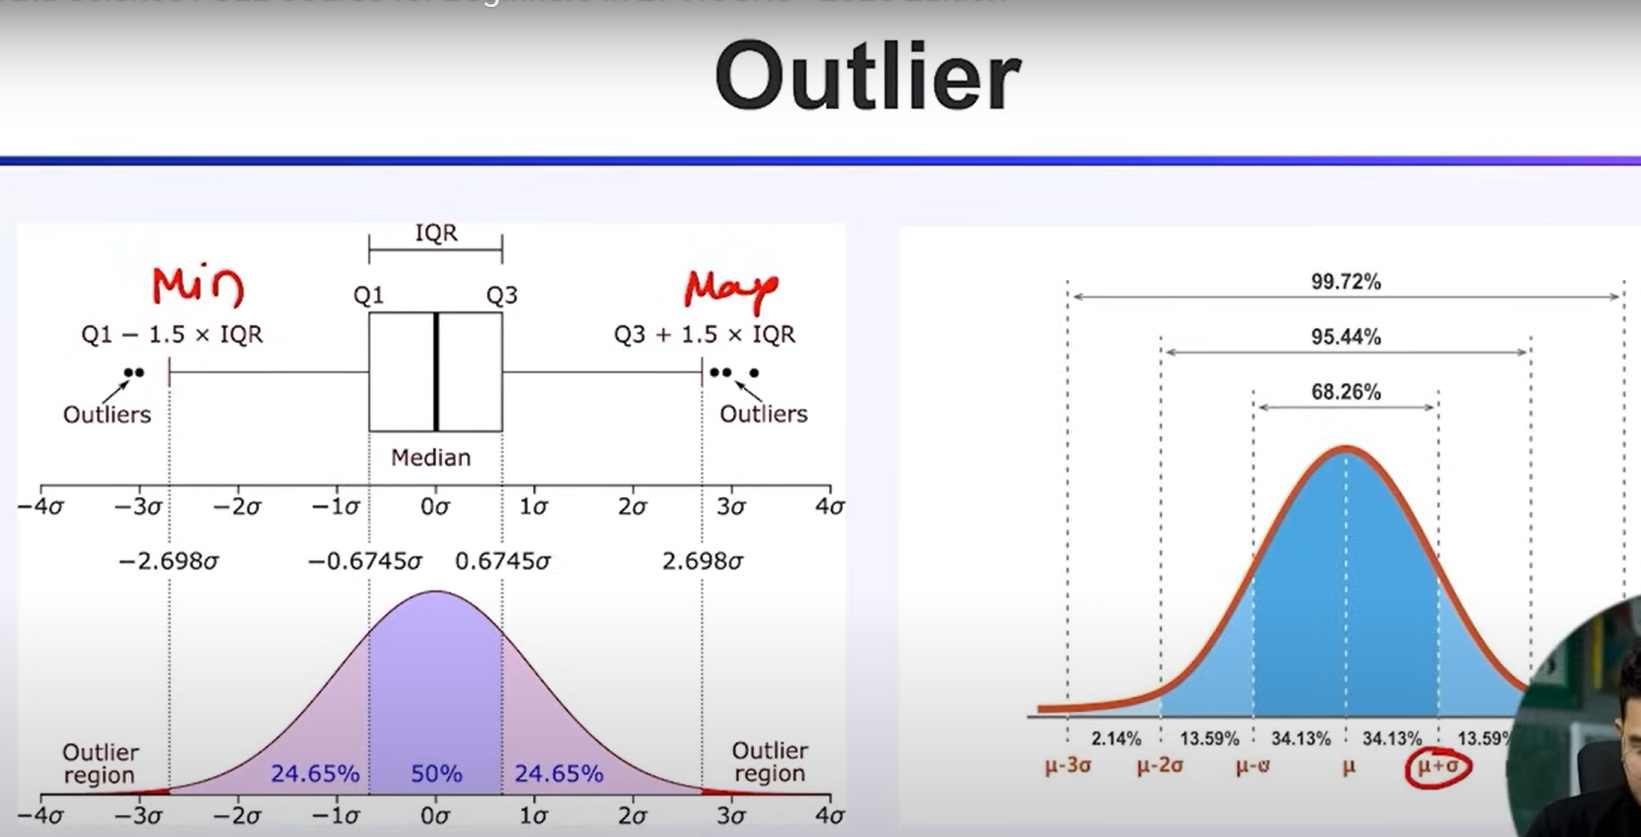

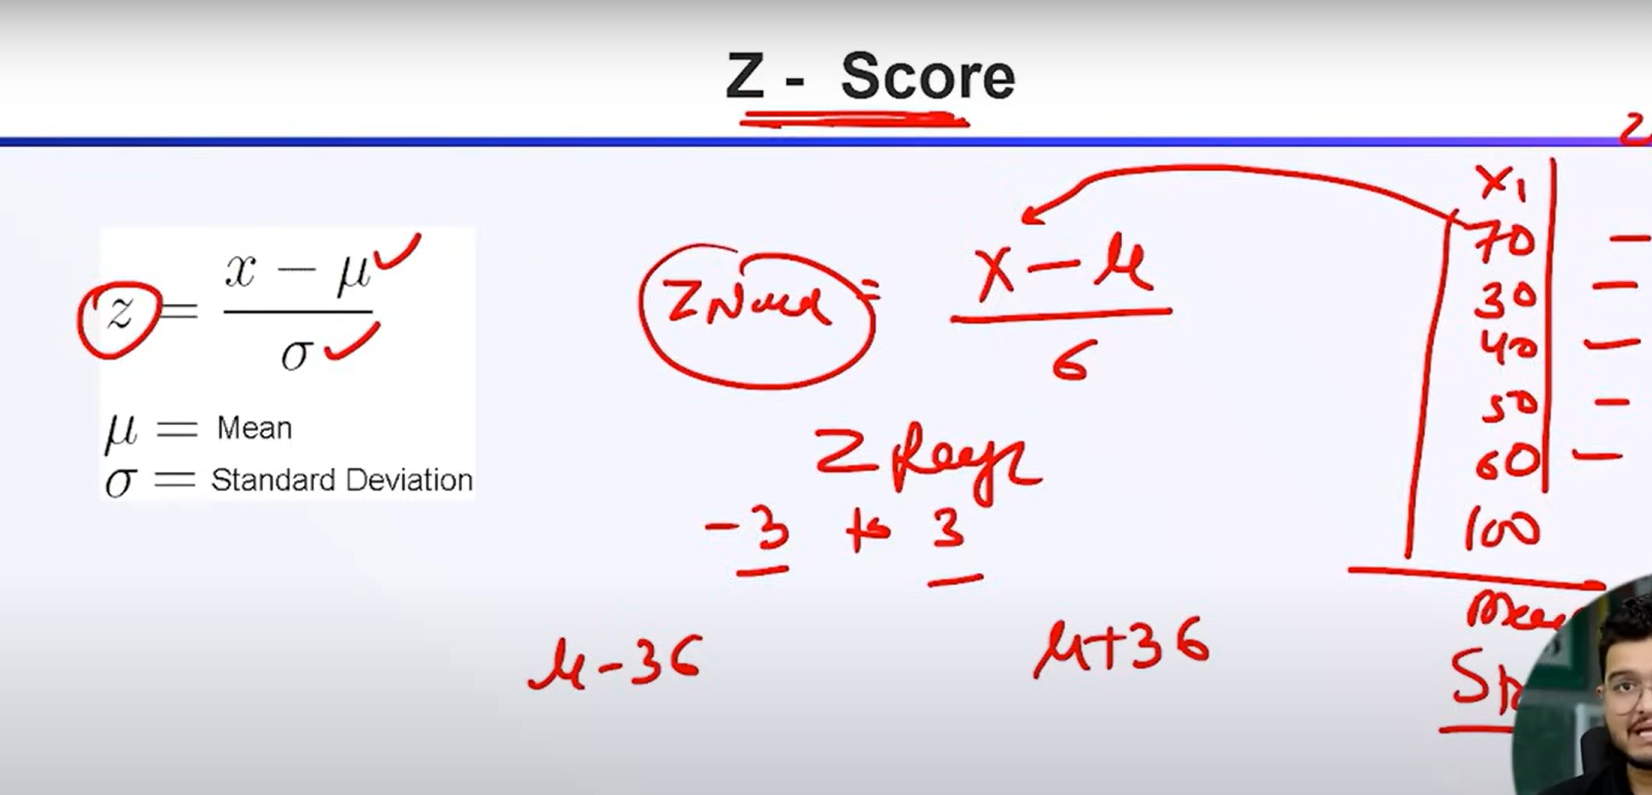

**z er value holo 3rd standard deviation and 3rd standard deviation er bairer sob value outliers**

In [38]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [39]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

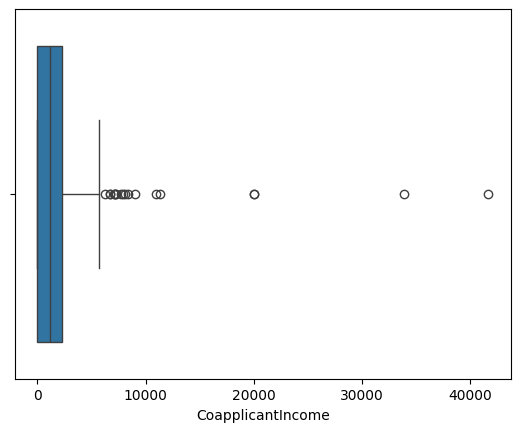

In [40]:
sns.boxplot(x= 'CoapplicantIncome', data=dataset)

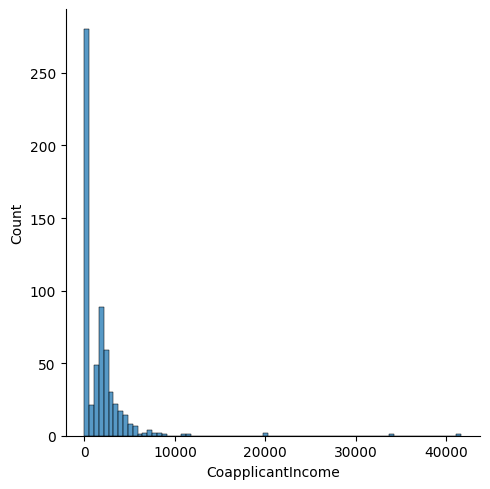

In [41]:
sns.displot(dataset['CoapplicantIncome'])

<h1><b><font color ='red'> Removing outlier using max_range

In [42]:
min_range = dataset['CoapplicantIncome'].mean() - (3 * dataset['CoapplicantIncome'].std())
max_range = dataset['CoapplicantIncome'].mean() + (3 * dataset['CoapplicantIncome'].std())

In [43]:
min_range,max_range

(np.float64(-7157.499309645475), np.float64(10399.990905699677))

We won't take any negative value. So work with max_range

In [44]:
new_dataset1 = dataset[dataset['CoapplicantIncome'] <= max_range]

In [46]:
new_dataset1.shape

(608, 13)

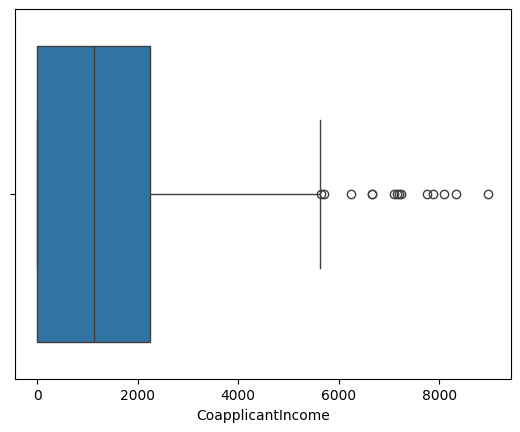

In [48]:
sns.boxplot(x='CoapplicantIncome', data=new_dataset1)
plt.show()

<h1><b><font color ='red'> Removing outlier using z-score


In [50]:
z_score = (dataset['CoapplicantIncome'] - dataset['CoapplicantIncome'].mean())/dataset['CoapplicantIncome'].std()
z_score

,CoapplicantIncome
0,-0.554036
1,-0.038700
2,-0.554036
3,0.251774
4,-0.554036
...,...
609,-0.554036
610,-0.554036
611,-0.472019
612,-0.554036


In [51]:
z_score>3

,CoapplicantIncome
0,False
1,False
2,False
3,False
4,False
...,...
609,False
610,False
611,False
612,False


In [53]:
dataset['z_score'] = z_score

In [54]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [55]:
dataset[dataset['z_score'] < 3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036
